# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Loading

In [2]:
ba_reviews = pd.read_parquet('../generated/new_ba_reviews.parquet')
rb_reviews = pd.read_parquet('../generated/new_rb_reviews.parquet')

ba_reviews = ba_reviews[['user_id', 'date']]
ba_reviews = ba_reviews[['user_id', 'date']]

ba_users_joined = pd.read_parquet('../generated/ba_users_joined.parquet')
rb_users_joined = pd.read_parquet('../generated/rb_users_joined.parquet')

# Data Preparation

In [3]:
display(ba_users_joined.sort_values(by= 'user_id').reset_index(drop= True))
display(rb_users_joined.sort_values(by= 'user_id').reset_index(drop= True))

,user_id,joined
0,-----kiki-----.1000245,2015-06-15 10:00:00
1,---.940711,2015-02-07 11:00:00
2,--dida--.1042029,2015-09-13 10:00:00
3,--dom--.709199,2012-12-22 11:00:00
4,--nomad--.931404,2015-01-22 11:00:00
...,...,...
151047,zzxasd43and.416381,2010-01-16 11:00:00
151048,zzyskowski.807938,2014-06-17 10:00:00
151049,zzyzx.174143,2007-11-21 11:00:00
151050,zzz999.829367,2014-07-20 10:00:00


,user_id,joined
0,10,2000-04-12 10:00:00
1,100007,2010-01-12 11:00:00
2,100011,2010-01-12 11:00:00
3,100012,2010-01-12 11:00:00
4,100021,2010-01-12 11:00:00
...,...,...
70085,99974,2010-01-11 11:00:00
70086,99986,2010-01-12 11:00:00
70087,99992,2010-01-12 11:00:00
70088,99994,2010-01-12 11:00:00


In [4]:
ba_unique_users = ba_reviews['user_id'].unique()
ba_users_clust = ba_users_joined[ba_users_joined['user_id'].isin(ba_unique_users)].sort_values(by= 'user_id').reset_index(drop= True).copy()
ba_users_clust['platform'] = 'BeerAdvocate'

rb_unique_users = rb_reviews['user_id'].unique()
rb_users_clust = rb_users_joined[rb_users_joined['user_id'].isin(rb_unique_users)].sort_values(by= 'user_id').reset_index(drop= True).copy()
rb_users_clust['platform'] = 'RateBeer'

In [5]:
ba_groupby_users = ba_reviews.groupby('user_id')
rb_groupby_users = rb_reviews.groupby('user_id')

In [6]:
display(ba_users_clust)
display(rb_users_clust)

,user_id,joined,platform
0,--dom--.709199,2012-12-22 11:00:00,BeerAdvocate
1,--weezl--.789708,2014-03-21 11:00:00,BeerAdvocate
2,-blast-tyrant-.1105240,2016-02-06 11:00:00,BeerAdvocate
3,-hoptimus_prime-.960108,2015-03-17 11:00:00,BeerAdvocate
4,-liam-.930824,2015-01-21 11:00:00,BeerAdvocate
...,...,...,...
60969,zytos.1045894,2015-09-22 10:00:00,BeerAdvocate
60970,zyxt.993924,2015-05-31 10:00:00,BeerAdvocate
60971,zz427.1113802,2016-02-27 11:00:00,BeerAdvocate
60972,zzombie.658444,2012-02-05 11:00:00,BeerAdvocate


,user_id,joined,platform
0,10,2000-04-12 10:00:00,RateBeer
1,100007,2010-01-12 11:00:00,RateBeer
2,100011,2010-01-12 11:00:00,RateBeer
3,100012,2010-01-12 11:00:00,RateBeer
4,100021,2010-01-12 11:00:00,RateBeer
...,...,...,...
70065,99974,2010-01-11 11:00:00,RateBeer
70066,99986,2010-01-12 11:00:00,RateBeer
70067,99992,2010-01-12 11:00:00,RateBeer
70068,99994,2010-01-12 11:00:00,RateBeer


# Features Implementation

## 1. Total number of reviews

In [7]:
ba_users_clust['total_reviews'] = ba_groupby_users.agg(total_reviews= ('date', 'count')).reset_index().sort_values(by= 'user_id').total_reviews
rb_users_clust['total_reviews'] = rb_groupby_users.agg(total_reviews= ('date', 'count')).reset_index().sort_values(by= 'user_id').total_reviews

In [8]:
display(ba_users_clust)
display(rb_users_clust)

,user_id,joined,platform,total_reviews
0,--dom--.709199,2012-12-22 11:00:00,BeerAdvocate,53
1,--weezl--.789708,2014-03-21 11:00:00,BeerAdvocate,3
2,-blast-tyrant-.1105240,2016-02-06 11:00:00,BeerAdvocate,1
3,-hoptimus_prime-.960108,2015-03-17 11:00:00,BeerAdvocate,4
4,-liam-.930824,2015-01-21 11:00:00,BeerAdvocate,1
...,...,...,...,...
60969,zytos.1045894,2015-09-22 10:00:00,BeerAdvocate,1
60970,zyxt.993924,2015-05-31 10:00:00,BeerAdvocate,1
60971,zz427.1113802,2016-02-27 11:00:00,BeerAdvocate,2
60972,zzombie.658444,2012-02-05 11:00:00,BeerAdvocate,1


,user_id,joined,platform,total_reviews
0,10,2000-04-12 10:00:00,RateBeer,5
1,100007,2010-01-12 11:00:00,RateBeer,73
2,100011,2010-01-12 11:00:00,RateBeer,46
3,100012,2010-01-12 11:00:00,RateBeer,30
4,100021,2010-01-12 11:00:00,RateBeer,1
...,...,...,...,...
70065,99974,2010-01-11 11:00:00,RateBeer,1
70066,99986,2010-01-12 11:00:00,RateBeer,1
70067,99992,2010-01-12 11:00:00,RateBeer,2
70068,99994,2010-01-12 11:00:00,RateBeer,10


## 2. Time since registration (until last activity recorded)

In [9]:
ba_users_clust['last_review'] = ba_groupby_users.agg(last_review= ('date', 'max')).reset_index().sort_values(by= 'user_id').last_review
rb_users_clust['last_review'] = rb_groupby_users.agg(last_review= ('date', 'max')).reset_index().sort_values(by= 'user_id').last_review

ba_users_clust['seniority'] = (ba_users_clust['last_review'] - ba_users_clust['joined']).dt.days
rb_users_clust['seniority'] = (rb_users_clust['last_review'] - rb_users_clust['joined']).dt.days

In [10]:
display(ba_users_clust)
display(rb_users_clust)

,user_id,joined,platform,total_reviews,last_review,seniority
0,--dom--.709199,2012-12-22 11:00:00,BeerAdvocate,53,2017-03-21 11:00:00,1550
1,--weezl--.789708,2014-03-21 11:00:00,BeerAdvocate,3,2015-03-21 11:00:00,365
2,-blast-tyrant-.1105240,2016-02-06 11:00:00,BeerAdvocate,1,2016-03-25 11:00:00,48
3,-hoptimus_prime-.960108,2015-03-17 11:00:00,BeerAdvocate,4,2015-03-17 11:00:00,0
4,-liam-.930824,2015-01-21 11:00:00,BeerAdvocate,1,2015-06-22 10:00:00,151
...,...,...,...,...,...,...
60969,zytos.1045894,2015-09-22 10:00:00,BeerAdvocate,1,2015-10-02 10:00:00,10
60970,zyxt.993924,2015-05-31 10:00:00,BeerAdvocate,1,2015-12-20 11:00:00,203
60971,zz427.1113802,2016-02-27 11:00:00,BeerAdvocate,2,2016-03-01 11:00:00,3
60972,zzombie.658444,2012-02-05 11:00:00,BeerAdvocate,1,2012-12-20 11:00:00,319


,user_id,joined,platform,total_reviews,last_review,seniority
0,10,2000-04-12 10:00:00,RateBeer,5,2000-08-11 10:00:00,121
1,100007,2010-01-12 11:00:00,RateBeer,73,2016-06-14 10:00:00,2344
2,100011,2010-01-12 11:00:00,RateBeer,46,2012-02-21 11:00:00,770
3,100012,2010-01-12 11:00:00,RateBeer,30,2015-01-22 11:00:00,1836
4,100021,2010-01-12 11:00:00,RateBeer,1,2010-01-12 11:00:00,0
...,...,...,...,...,...,...
70065,99974,2010-01-11 11:00:00,RateBeer,1,2010-01-11 11:00:00,0
70066,99986,2010-01-12 11:00:00,RateBeer,1,2010-01-12 11:00:00,0
70067,99992,2010-01-12 11:00:00,RateBeer,2,2010-01-12 11:00:00,0
70068,99994,2010-01-12 11:00:00,RateBeer,10,2012-01-06 11:00:00,724


## 3. Time spacing between reviews

In [11]:
ba_reviews_sorted = ba_reviews.sort_values(['user_id', 'date'])
# user difference between two consecutive reviews
ba_time_differences = ba_reviews_sorted.groupby('user_id')['date'].apply(lambda x : x.diff().dt.days)
# compute mean_time_spacing and standard_deviation_time_spacing
ba_users_clust[['mean_time_spacing', 'std_time_spacing']] = ba_time_differences.groupby('user_id').agg(['mean', 'std']).reset_index().sort_values(by= 'user_id')[['mean','std']]

rb_reviews_sorted = rb_reviews.sort_values(['user_id', 'date'])
# user difference between two consecutive reviews
rb_time_differences = rb_reviews_sorted.groupby('user_id')['date'].apply(lambda x : x.diff().dt.days)
# compute mean_time_spacing and standard_deviation_time_spacing
rb_users_clust[['mean_time_spacing', 'std_time_spacing']] = rb_time_differences.groupby('user_id').agg(['mean', 'std']).reset_index().sort_values(by= 'user_id')[['mean','std']]

In [12]:
display(ba_users_clust)
display(rb_users_clust)

,user_id,joined,platform,total_reviews,last_review,seniority,mean_time_spacing,std_time_spacing
0,--dom--.709199,2012-12-22 11:00:00,BeerAdvocate,53,2017-03-21 11:00:00,1550,29.692308,77.090102
1,--weezl--.789708,2014-03-21 11:00:00,BeerAdvocate,3,2015-03-21 11:00:00,365,0.000000,0.000000
2,-blast-tyrant-.1105240,2016-02-06 11:00:00,BeerAdvocate,1,2016-03-25 11:00:00,48,NaN,NaN
3,-hoptimus_prime-.960108,2015-03-17 11:00:00,BeerAdvocate,4,2015-03-17 11:00:00,0,0.000000,0.000000
4,-liam-.930824,2015-01-21 11:00:00,BeerAdvocate,1,2015-06-22 10:00:00,151,NaN,NaN
...,...,...,...,...,...,...,...,...
60969,zytos.1045894,2015-09-22 10:00:00,BeerAdvocate,1,2015-10-02 10:00:00,10,NaN,NaN
60970,zyxt.993924,2015-05-31 10:00:00,BeerAdvocate,1,2015-12-20 11:00:00,203,NaN,NaN
60971,zz427.1113802,2016-02-27 11:00:00,BeerAdvocate,2,2016-03-01 11:00:00,3,3.000000,NaN
60972,zzombie.658444,2012-02-05 11:00:00,BeerAdvocate,1,2012-12-20 11:00:00,319,NaN,NaN


,user_id,joined,platform,total_reviews,last_review,seniority,mean_time_spacing,std_time_spacing
0,10,2000-04-12 10:00:00,RateBeer,5,2000-08-11 10:00:00,121,19.250000,21.468970
1,100007,2010-01-12 11:00:00,RateBeer,73,2016-06-14 10:00:00,2344,31.861111,83.476455
2,100011,2010-01-12 11:00:00,RateBeer,46,2012-02-21 11:00:00,770,16.022222,71.223237
3,100012,2010-01-12 11:00:00,RateBeer,30,2015-01-22 11:00:00,1836,63.103448,233.109316
4,100021,2010-01-12 11:00:00,RateBeer,1,2010-01-12 11:00:00,0,NaN,NaN
...,...,...,...,...,...,...,...,...
70065,99974,2010-01-11 11:00:00,RateBeer,1,2010-01-11 11:00:00,0,NaN,NaN
70066,99986,2010-01-12 11:00:00,RateBeer,1,2010-01-12 11:00:00,0,NaN,NaN
70067,99992,2010-01-12 11:00:00,RateBeer,2,2010-01-12 11:00:00,0,0.000000,NaN
70068,99994,2010-01-12 11:00:00,RateBeer,10,2012-01-06 11:00:00,724,80.444444,236.866582


# Features Definition

The following features are used to analyze user behavior and hence identify experts on each datasets:

1. **`total_reviews`**:
   - **Definition**: The total number of reviews submitted by the user.
   - **Purpose**: Captures the level of activity or engagement of a user on the platform.

2. **`seniority`**:
   - **Definition**: The time (in days) since the user's first review.
   - **Purpose**: Measures the longevity of the user's participation on the platform.

3. **`mean_time_spacing`**:
   - **Definition**: The average time (in days) between two consecutive reviews by the user.
   - **Purpose**: Indicates how regularly the user submits reviews. Lower values suggest more frequent activity.

4. **`std_time_spacing`**:
   - **Definition**: The standard deviation of the time (in days) between consecutive reviews.
   - **Purpose**: Measures the consistency of the user's review frequency. Lower values suggest more regular intervals between reviews, while higher values indicate variability.

These features help characterize user activity and behavior over time, enabling clustering or further analysis of user patterns.


In [13]:
concat_features = pd.concat([ba_users_clust, rb_users_clust]).dropna().drop(['joined', 'last_review'], axis= 1).set_index(['user_id', 'platform'])
ba_features = ba_users_clust.dropna().drop(['joined', 'platform', 'last_review'], axis= 1).set_index('user_id').copy() 
rb_features = rb_users_clust.dropna().drop(['joined', 'platform', 'last_review'], axis= 1).set_index('user_id').copy()

Why use of .dropna() implies: It removes users with 1 review (no time_spacing) and 2 reviews (no std_time_spacing)

In [14]:
nan_counts = ba_features.isna().sum()
print(f"NaN values in BeerAdvocate features : \n{nan_counts}\n")
nan_counts = rb_features.isna().sum()
print(f"NaN values in RateBeer features : \n{nan_counts}\n")

NaN values in BeerAdvocate features : 
total_reviews        0
seniority            0
mean_time_spacing    0
std_time_spacing     0
dtype: int64

NaN values in RateBeer features : 
total_reviews        0
seniority            0
mean_time_spacing    0
std_time_spacing     0
dtype: int64



Everything seems good to start clustering.

In [15]:
display(ba_features)
display(rb_features)
display(concat_features)

,total_reviews,seniority,mean_time_spacing,std_time_spacing
user_id,,,,
--dom--.709199,53,1550,29.692308,77.090102
--weezl--.789708,3,365,0.000000,0.000000
-hoptimus_prime-.960108,4,0,0.000000,0.000000
-mk-.763762,8,814,116.142857,246.647811
-rick.912339,194,938,4.725389,12.104245
...,...,...,...,...
zymurgist12.1048285,9,1,0.125000,0.353553
zymurgo.447590,5,65,16.000000,20.215506
zymurgy4all.11427,95,3714,35.308511,162.852135


,total_reviews,seniority,mean_time_spacing,std_time_spacing
user_id,,,,
10,5,121,19.250000,21.468970
100007,73,2344,31.861111,83.476455
100011,46,770,16.022222,71.223237
100012,30,1836,63.103448,233.109316
100022,7,5,0.000000,0.000000
...,...,...,...,...
99936,8,447,63.857143,134.214292
99959,93,411,4.456522,8.879428
99970,6,148,6.600000,5.079370


,,total_reviews,seniority,mean_time_spacing,std_time_spacing
user_id,platform,,,,
--dom--.709199,BeerAdvocate,53,1550,29.692308,77.090102
--weezl--.789708,BeerAdvocate,3,365,0.000000,0.000000
-hoptimus_prime-.960108,BeerAdvocate,4,0,0.000000,0.000000
-mk-.763762,BeerAdvocate,8,814,116.142857,246.647811
-rick.912339,BeerAdvocate,194,938,4.725389,12.104245
...,...,...,...,...,...
99936,RateBeer,8,447,63.857143,134.214292
99959,RateBeer,93,411,4.456522,8.879428
99970,RateBeer,6,148,6.600000,5.079370


# Clustering

## On BeerAdvocate

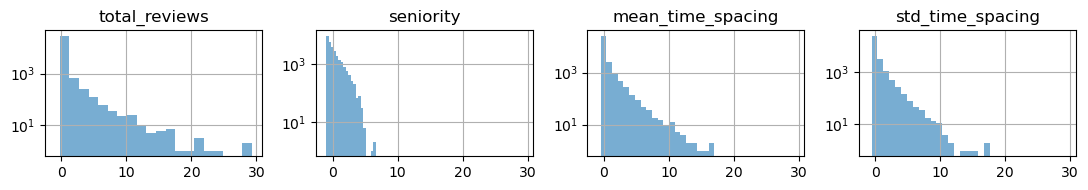

In [16]:
df_features = ba_features
df_features_scaled = pd.DataFrame(StandardScaler().fit(df_features).transform(df_features), columns= df_features.columns)
columns = df_features_scaled.columns

fig, axs = plt.subplots(1, len(columns), figsize=(11, 2), sharex=True)

for column_idx in range(0, len(columns)):
    df_features_scaled[columns[column_idx]].hist(bins=20, ax=axs[column_idx], alpha=0.6)
    axs[column_idx].set_title(columns[column_idx])
    axs[column_idx].set_yscale('log') 
    
plt.tight_layout()

### Number of clusters (silhouette score + elbow method)

Implementation with k=2 done
Implementation with k=3 done
Implementation with k=4 done
Implementation with k=5 done
Implementation with k=6 done
Implementation with k=7 done
Implementation with k=8 done
Implementation with k=9 done
Implementation with k=10 done


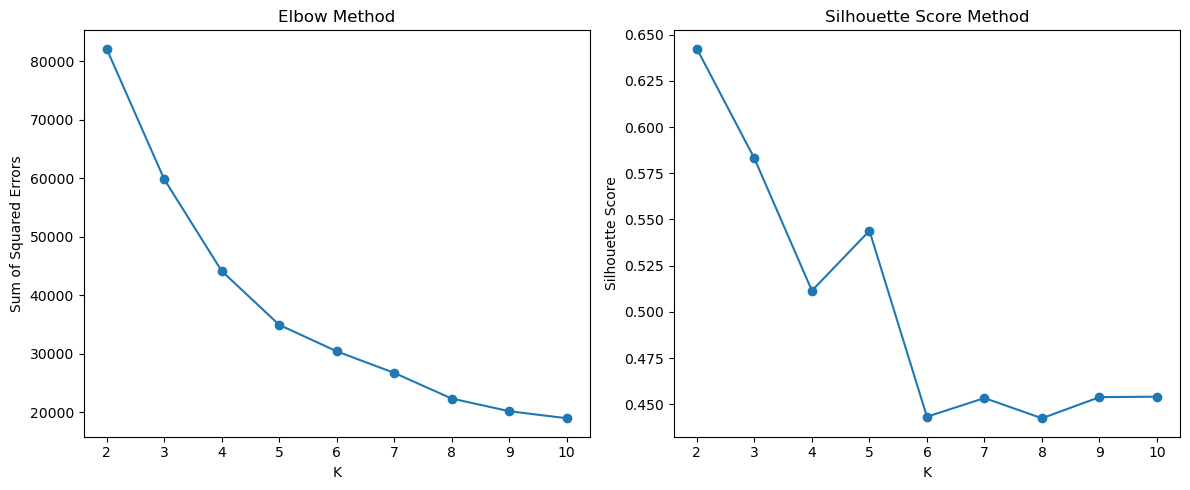

In [17]:
def plot_clustering_metrics(features_X, start=2, end=11):
    # Elbow Method
    sse = []
    for k in range(start, end):
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)

    # Silhouette Score
    silhouettes = []
    for k in range(start, end):
        labels = KMeans(n_clusters=k, random_state=10).fit_predict(features_X)
        score = silhouette_score(features_X, labels)
        silhouettes.append({"k": k, "score": score})
        print(f"Implementation with k={k} done")

    silhouettes = pd.DataFrame(silhouettes)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Elbow Method
    axes[0].plot(sse.k, sse.sse, marker='o')
    axes[0].set_xlabel("K")
    axes[0].set_ylabel("Sum of Squared Errors")
    axes[0].set_title("Elbow Method")

    # Plot Silhouette Score
    axes[1].plot(silhouettes.k, silhouettes.score, marker='o')
    axes[1].set_xlabel("K")
    axes[1].set_ylabel("Silhouette Score")
    axes[1].set_title("Silhouette Score Method")

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with your features
plot_clustering_metrics(df_features_scaled)

**Analyze:** find the number of clusters

### Predicting

In [18]:
number_clusters = 5 #to determine

kmeans = KMeans(n_clusters= number_clusters, random_state= 0)
labels = kmeans.fit_predict(df_features_scaled)
ba_clusterised = pd.DataFrame(pd.Series(labels, index= df_features.index, name= 'cluster')).reset_index()

number_label_experts = 0 #to determine

ba_experts = ba_clusterised['user_id'][ba_clusterised['cluster'] == number_label_experts]
ba_experts.to_csv('../generated/ba_experts.csv', index=False)

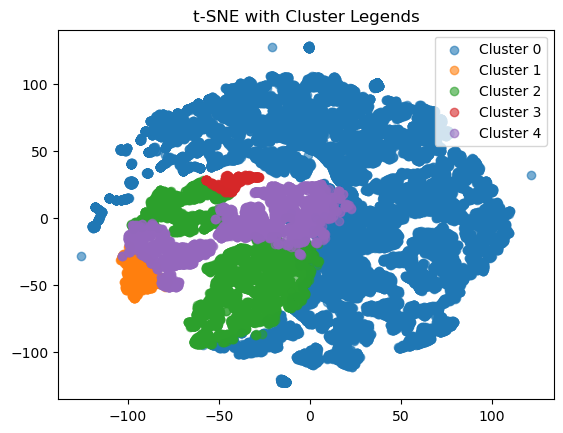

In [19]:
# perform t-SNE dimensionality reduction
df_scaled_features_reduced_tsne = TSNE(n_components= 2, init= 'random', learning_rate= 'auto', random_state= 0).fit_transform(df_features_scaled)
for cluster in range(number_clusters):
    cluster_points = df_scaled_features_reduced_tsne[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("t-SNE with Cluster Legends")
plt.legend()
plt.show()

## On RateBeer

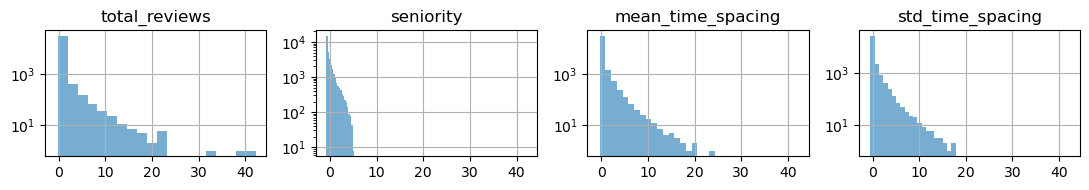

In [20]:
df_features = rb_features
df_features_scaled = pd.DataFrame(StandardScaler().fit(df_features).transform(df_features), columns= df_features.columns)
columns = df_features_scaled.columns

fig, axs = plt.subplots(1, len(columns), figsize=(11, 2), sharex=True)

for column_idx in range(0, len(columns)):
    df_features_scaled[columns[column_idx]].hist(bins=20, ax=axs[column_idx], alpha=0.6)
    axs[column_idx].set_title(columns[column_idx])
    axs[column_idx].set_yscale('log') 
    
plt.tight_layout()

### Number of clusters (silhouette score + elbow method)

Implementation with k=2 done
Implementation with k=3 done
Implementation with k=4 done
Implementation with k=5 done
Implementation with k=6 done
Implementation with k=7 done
Implementation with k=8 done
Implementation with k=9 done
Implementation with k=10 done


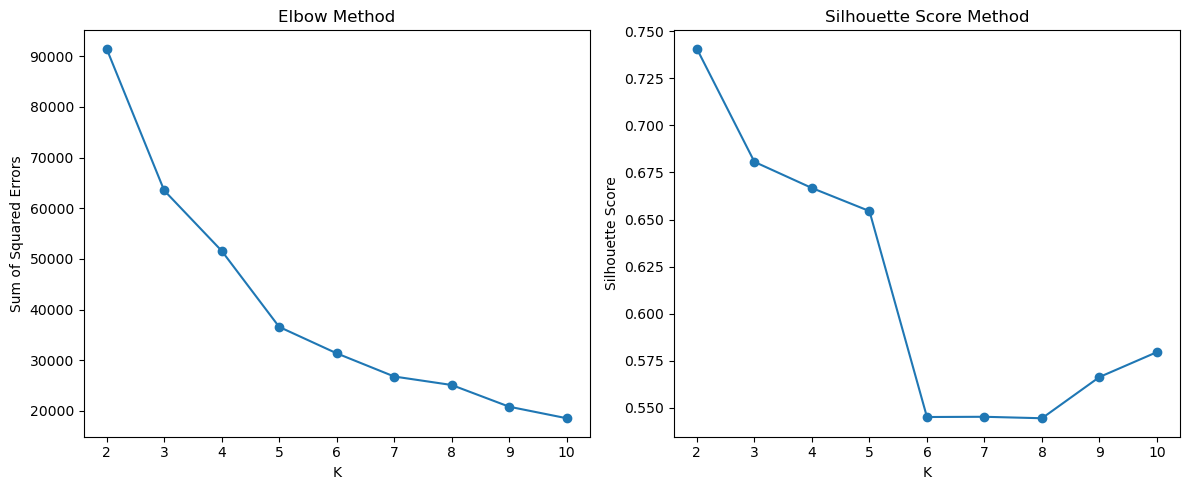

In [21]:
plot_clustering_metrics(df_features_scaled)

**Analyze:** find the number of clusters

### Predicting

In [22]:
number_clusters = 5 #to determine

kmeans = KMeans(n_clusters= number_clusters, random_state= 0)
labels = kmeans.fit_predict(df_features_scaled)
rb_clusterised = pd.DataFrame(pd.Series(labels, index= df_features.index, name= 'cluster')).reset_index()

number_label_experts = 0 #to determine

rb_experts = rb_clusterised['user_id'][rb_clusterised['cluster'] == number_label_experts]
rb_experts.to_csv('../generated/rb_experts.csv', index=False)

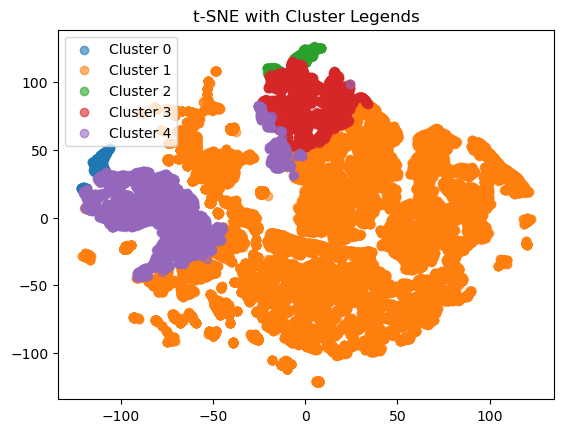

In [23]:
# perform t-SNE dimensionality reduction
df_scaled_features_reduced_tsne = TSNE(n_components= 2, init= 'random', learning_rate= 'auto', random_state= 0).fit_transform(df_features_scaled)
for cluster in range(number_clusters):
    cluster_points = df_scaled_features_reduced_tsne[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("t-SNE with Cluster Legends")
plt.legend()
plt.show()